# Spark DataFrame - Basics

Let's start off with the fundamentals of Spark DataFrame. 

Objective: In this exercise, you'll find out how to start a spark session, read in data, explore the data and manipuluate the data (using DataFrame syntax as well as SQL syntax). Let's get started! 

In [17]:
# Must be included at the beginning of each new notebook. Remember to change the app name.
import findspark
findspark.init('/home/ubuntu/spark-3.2.1-bin-hadoop2.7')
import warnings
warnings.simplefilter(action='ignore')
import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('readin').getOrCreate()

In [3]:
# Let's read in the data. Note that it's in the csv

#City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
#define the schema

# Let's import in the relevant types.

from pyspark.sql.types import *
Schema=StructType([
  StructField("City",StringType(),nullable=True),
  StructField("Date",StringType(),nullable=True),
  StructField("PM25",FloatType(),nullable=True),
  StructField("PM10",FloatType(),nullable=True),
  StructField("NO",FloatType(),nullable=True),
  StructField("NO2",FloatType(),nullable=True),
  StructField("NOX",FloatType(),nullable=True),
  StructField("NH3",FloatType(),nullable=True),
  StructField("CO",FloatType(),nullable=True),
  StructField("SO2",FloatType(),nullable=True),
  StructField("O3",FloatType(),nullable=True),
  StructField("benzene",FloatType(),nullable=True),
  StructField("toluene",FloatType(),nullable=True),
  StructField("Xylene",FloatType(),nullable=True),
  StructField("AQI",FloatType(),nullable=True),
  StructField("AQIBucket",StringType(),nullable=True)
])
df = spark.read.option("header",True).schema(Schema).csv("Datasets/city_day.csv")

df.show()


22/10/08 05:24:43 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: City, Date, PM2.5, PM10, NO, NO2, NOx, NH3, CO, SO2, O3, Benzene, Toluene, Xylene, AQI, AQI_Bucket
 Schema: City, Date, PM25, PM10, NO, NO2, NOX, NH3, CO, SO2, O3, benzene, toluene, Xylene, AQI, AQIBucket
Expected: PM25 but found: PM2.5
CSV file: file:///home/ubuntu/722/aws-722-copy/Datasets/city_day.csv


+---------+----------+----+----+------+-----+------+----+------+-----+------+-------+-------+------+----+---------+
|     City|      Date|PM25|PM10|    NO|  NO2|   NOX| NH3|    CO|  SO2|    O3|benzene|toluene|Xylene| AQI|AQIBucket|
+---------+----------+----+----+------+-----+------+----+------+-----+------+-------+-------+------+----+---------+
|Ahmedabad|2015-01-01|null|null|  0.92|18.22| 17.15|null|  0.92|27.64|133.36|    0.0|   0.02|   0.0|null|     null|
|Ahmedabad|2015-01-02|null|null|  0.97|15.69| 16.46|null|  0.97|24.55| 34.06|   3.68|    5.5|  3.77|null|     null|
|Ahmedabad|2015-01-03|null|null|  17.4| 19.3|  29.7|null|  17.4|29.07|  30.7|    6.8|   16.4|  2.25|null|     null|
|Ahmedabad|2015-01-04|null|null|   1.7|18.48| 17.97|null|   1.7|18.59| 36.08|   4.43|  10.14|   1.0|null|     null|
|Ahmedabad|2015-01-05|null|null|  22.1|21.42| 37.76|null|  22.1|39.33| 39.31|   7.01|  18.89|  2.78|null|     null|
|Ahmedabad|2015-01-06|null|null| 45.41|38.48|  81.5|null| 45.41|45.76| 4

## Data Exploration

In [4]:
# The show method allows you visualise DataFrames. We can see that there are two columns. 
df.show()

# You could also try this. 
df.columns

df.dtypes

df.describe().toPandas()


22/10/08 05:24:50 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: City, Date, PM2.5, PM10, NO, NO2, NOx, NH3, CO, SO2, O3, Benzene, Toluene, Xylene, AQI, AQI_Bucket
 Schema: City, Date, PM25, PM10, NO, NO2, NOX, NH3, CO, SO2, O3, benzene, toluene, Xylene, AQI, AQIBucket
Expected: PM25 but found: PM2.5
CSV file: file:///home/ubuntu/722/aws-722-copy/Datasets/city_day.csv


+---------+----------+----+----+------+-----+------+----+------+-----+------+-------+-------+------+----+---------+
|     City|      Date|PM25|PM10|    NO|  NO2|   NOX| NH3|    CO|  SO2|    O3|benzene|toluene|Xylene| AQI|AQIBucket|
+---------+----------+----+----+------+-----+------+----+------+-----+------+-------+-------+------+----+---------+
|Ahmedabad|2015-01-01|null|null|  0.92|18.22| 17.15|null|  0.92|27.64|133.36|    0.0|   0.02|   0.0|null|     null|
|Ahmedabad|2015-01-02|null|null|  0.97|15.69| 16.46|null|  0.97|24.55| 34.06|   3.68|    5.5|  3.77|null|     null|
|Ahmedabad|2015-01-03|null|null|  17.4| 19.3|  29.7|null|  17.4|29.07|  30.7|    6.8|   16.4|  2.25|null|     null|
|Ahmedabad|2015-01-04|null|null|   1.7|18.48| 17.97|null|   1.7|18.59| 36.08|   4.43|  10.14|   1.0|null|     null|
|Ahmedabad|2015-01-05|null|null|  22.1|21.42| 37.76|null|  22.1|39.33| 39.31|   7.01|  18.89|  2.78|null|     null|
|Ahmedabad|2015-01-06|null|null| 45.41|38.48|  81.5|null| 45.41|45.76| 4

22/10/08 05:24:51 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: City, Date, PM2.5, PM10, NO, NO2, NOx, NH3, CO, SO2, O3, Benzene, Toluene, Xylene, AQI, AQI_Bucket
 Schema: City, Date, PM25, PM10, NO, NO2, NOX, NH3, CO, SO2, O3, benzene, toluene, Xylene, AQI, AQIBucket
Expected: PM25 but found: PM2.5
CSV file: file:///home/ubuntu/722/aws-722-copy/Datasets/city_day.csv


,summary,City,Date,PM25,PM10,NO,NO2,NOX,NH3,CO,SO2,O3,benzene,toluene,Xylene,AQI,AQIBucket
0,count,29531,29531,24933,18391,25949,25946,25346,19203,27472,25677,25509,23908,21490,11422,24850,24850
1,mean,None,None,67.45057795305125,118.12710294174458,17.574729666828148,28.560659052670943,32.3091233306691,23.483476022437166,2.248598209145695,14.531977259530647,34.49143047007627,3.280840303665094,8.700972087396305,3.0701278206492613,166.4635814889336,None
2,stddev,None,None,64.66144940408857,90.60510976469615,22.785846340154315,24.474745771469095,31.646010951236956,25.68427498752751,6.962884271836143,18.13377486834342,21.694928182946093,15.811136401685069,19.969163666257156,6.323247403424576,140.69658509414992,None
3,min,Ahmedabad,2015-01-01,0.04,0.01,0.02,0.01,0.0,0.01,0.0,0.01,0.01,0.0,0.0,0.0,13.0,Good
4,max,Visakhapatnam,2020-07-01,949.99,1000.0,390.68,362.21,467.63,352.89,175.81,193.86,257.73,455.03,454.85,170.37,2049.0,Very Poor


In [ ]:
# We can use the describe method get some general statistics on our data too. Remember to show the DataFrame!
# But what about data type?
# Then create a variable with the correct structure.
df.describe().show()

In [5]:
# For type, we can use print schema. 
# But wait! What if you want to change the format of the data? Maybe change age to an integer instead of long?
# And now we can read in the data using that schema. If we print the schema, we can see that age is now an integer.
df.printSchema()

root
 |-- City: string (nullable = true)
 |-- Date: string (nullable = true)
 |-- PM25: float (nullable = true)
 |-- PM10: float (nullable = true)
 |-- NO: float (nullable = true)
 |-- NO2: float (nullable = true)
 |-- NOX: float (nullable = true)
 |-- NH3: float (nullable = true)
 |-- CO: float (nullable = true)
 |-- SO2: float (nullable = true)
 |-- O3: float (nullable = true)
 |-- benzene: float (nullable = true)
 |-- toluene: float (nullable = true)
 |-- Xylene: float (nullable = true)
 |-- AQI: float (nullable = true)
 |-- AQIBucket: string (nullable = true)



## Data Manipulation

In [6]:
df.describe().toPandas()

df.groupby('AQIBucket').count().show()


22/10/08 05:25:15 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: City, Date, PM2.5, PM10, NO, NO2, NOx, NH3, CO, SO2, O3, Benzene, Toluene, Xylene, AQI, AQI_Bucket
 Schema: City, Date, PM25, PM10, NO, NO2, NOX, NH3, CO, SO2, O3, benzene, toluene, Xylene, AQI, AQIBucket
Expected: PM25 but found: PM2.5
CSV file: file:///home/ubuntu/722/aws-722-copy/Datasets/city_day.csv
22/10/08 05:25:16 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: AQI_Bucket
 Schema: AQIBucket
Expected: AQIBucket but found: AQI_Bucket
CSV file: file:///home/ubuntu/722/aws-722-copy/Datasets/city_day.csv


+------------+-----+
|   AQIBucket|count|
+------------+-----+
|        null| 4681|
|        Good| 1341|
|      Severe| 1338|
|   Very Poor| 2337|
|Satisfactory| 8224|
|        Poor| 2781|
|    Moderate| 8829|
+------------+-----+



In [7]:

df.groupby('City').count().show()

+------------------+-----+
|              City|count|
+------------------+-----+
|             Kochi|  162|
|             Patna| 1858|
|         Ernakulam|  162|
|           Chennai| 2009|
|           Lucknow| 2009|
|            Mumbai| 2009|
|            Aizawl|  113|
|         Ahmedabad| 2009|
|          Gurugram| 1679|
|      Brajrajnagar|  938|
|           Kolkata|  814|
|         Amaravati|  951|
|          Amritsar| 1221|
|          Shillong|  310|
|             Delhi| 2009|
|        Chandigarh|  304|
|        Coimbatore|  386|
|            Bhopal|  289|
|Thiruvananthapuram| 1112|
|         Bengaluru| 2009|
+------------------+-----+
only showing top 20 rows



In [8]:
df.count()
# Let's see the data. You'll notice nulls.
df.show()

+---------+----------+----+----+------+-----+------+----+------+-----+------+-------+-------+------+----+---------+
|     City|      Date|PM25|PM10|    NO|  NO2|   NOX| NH3|    CO|  SO2|    O3|benzene|toluene|Xylene| AQI|AQIBucket|
+---------+----------+----+----+------+-----+------+----+------+-----+------+-------+-------+------+----+---------+
|Ahmedabad|2015-01-01|null|null|  0.92|18.22| 17.15|null|  0.92|27.64|133.36|    0.0|   0.02|   0.0|null|     null|
|Ahmedabad|2015-01-02|null|null|  0.97|15.69| 16.46|null|  0.97|24.55| 34.06|   3.68|    5.5|  3.77|null|     null|
|Ahmedabad|2015-01-03|null|null|  17.4| 19.3|  29.7|null|  17.4|29.07|  30.7|    6.8|   16.4|  2.25|null|     null|
|Ahmedabad|2015-01-04|null|null|   1.7|18.48| 17.97|null|   1.7|18.59| 36.08|   4.43|  10.14|   1.0|null|     null|
|Ahmedabad|2015-01-05|null|null|  22.1|21.42| 37.76|null|  22.1|39.33| 39.31|   7.01|  18.89|  2.78|null|     null|
|Ahmedabad|2015-01-06|null|null| 45.41|38.48|  81.5|null| 45.41|45.76| 4

22/10/08 05:25:29 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: City, Date, PM2.5, PM10, NO, NO2, NOx, NH3, CO, SO2, O3, Benzene, Toluene, Xylene, AQI, AQI_Bucket
 Schema: City, Date, PM25, PM10, NO, NO2, NOX, NH3, CO, SO2, O3, benzene, toluene, Xylene, AQI, AQIBucket
Expected: PM25 but found: PM2.5
CSV file: file:///home/ubuntu/722/aws-722-copy/Datasets/city_day.csv


In [9]:
# First, we have to register the DataFrame as a SQL temporary view.
df.createOrReplaceTempView('pollution')

# After that, we can use the SQL programming language for queries. 
results = spark.sql("SELECT * FROM pollution")
results.show()

+---------+----------+----+----+------+-----+------+----+------+-----+------+-------+-------+------+----+---------+
|     City|      Date|PM25|PM10|    NO|  NO2|   NOX| NH3|    CO|  SO2|    O3|benzene|toluene|Xylene| AQI|AQIBucket|
+---------+----------+----+----+------+-----+------+----+------+-----+------+-------+-------+------+----+---------+
|Ahmedabad|2015-01-01|null|null|  0.92|18.22| 17.15|null|  0.92|27.64|133.36|    0.0|   0.02|   0.0|null|     null|
|Ahmedabad|2015-01-02|null|null|  0.97|15.69| 16.46|null|  0.97|24.55| 34.06|   3.68|    5.5|  3.77|null|     null|
|Ahmedabad|2015-01-03|null|null|  17.4| 19.3|  29.7|null|  17.4|29.07|  30.7|    6.8|   16.4|  2.25|null|     null|
|Ahmedabad|2015-01-04|null|null|   1.7|18.48| 17.97|null|   1.7|18.59| 36.08|   4.43|  10.14|   1.0|null|     null|
|Ahmedabad|2015-01-05|null|null|  22.1|21.42| 37.76|null|  22.1|39.33| 39.31|   7.01|  18.89|  2.78|null|     null|
|Ahmedabad|2015-01-06|null|null| 45.41|38.48|  81.5|null| 45.41|45.76| 4

22/10/08 05:25:32 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: City, Date, PM2.5, PM10, NO, NO2, NOx, NH3, CO, SO2, O3, Benzene, Toluene, Xylene, AQI, AQI_Bucket
 Schema: City, Date, PM25, PM10, NO, NO2, NOX, NH3, CO, SO2, O3, benzene, toluene, Xylene, AQI, AQIBucket
Expected: PM25 but found: PM2.5
CSV file: file:///home/ubuntu/722/aws-722-copy/Datasets/city_day.csv


In [10]:
# After that, we can use the SQL programming language for queries. 
results1 = spark.sql("SELECT city, count(City) FROM pollution where AQI is null group by City")
results1.show()

+------------------+-----------+
|              city|count(City)|
+------------------+-----------+
|             Kochi|          4|
|             Patna|        399|
|         Ernakulam|          9|
|           Chennai|        125|
|           Lucknow|        116|
|            Mumbai|       1234|
|            Aizawl|          2|
|         Ahmedabad|        675|
|          Gurugram|        226|
|      Brajrajnagar|        225|
|           Kolkata|         60|
|         Amaravati|        110|
|          Amritsar|         95|
|          Shillong|        105|
|             Delhi|         10|
|        Chandigarh|          5|
|        Coimbatore|         42|
|            Bhopal|         11|
|Thiruvananthapuram|         60|
|         Bengaluru|         99|
+------------------+-----------+
only showing top 20 rows



In [ ]:
# We can rename columns too! 
df.withColumnRenamed('age', 'my_new_age').show()

# Exploring data with SQL

22/10/08 05:35:55 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: City, Date, PM2.5, PM10, NO, NO2, NOx, NH3, CO, SO2, O3, Benzene, Toluene, Xylene, AQI, AQI_Bucket
 Schema: City, Date, PM25, PM10, NO, NO2, NOX, NH3, CO, SO2, O3, benzene, toluene, Xylene, AQI, AQIBucket
Expected: PM25 but found: PM2.5
CSV file: file:///home/ubuntu/722/aws-722-copy/Datasets/city_day.csv
22/10/08 05:35:55 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: City, Date, PM2.5, PM10, NO, NO2, NOx, NH3, CO, SO2, O3, Benzene, Toluene, Xylene, AQI, AQI_Bucket
 Schema: City, Date, PM25, PM10, NO, NO2, NOX, NH3, CO, SO2, O3, benzene, toluene, Xylene, AQI, AQIBucket
Expected: PM25 but found: PM2.5
CSV file: file:///home/ubuntu/722/aws-722-copy/Datasets/city_day.csv
22/10/08 05:35:56 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: City, Date, PM2.5, PM10, NO, NO2, NOx, NH3, CO, SO2, O3, Benzene, Toluene, Xylene, AQI, AQI_Bucket
 Schema: C

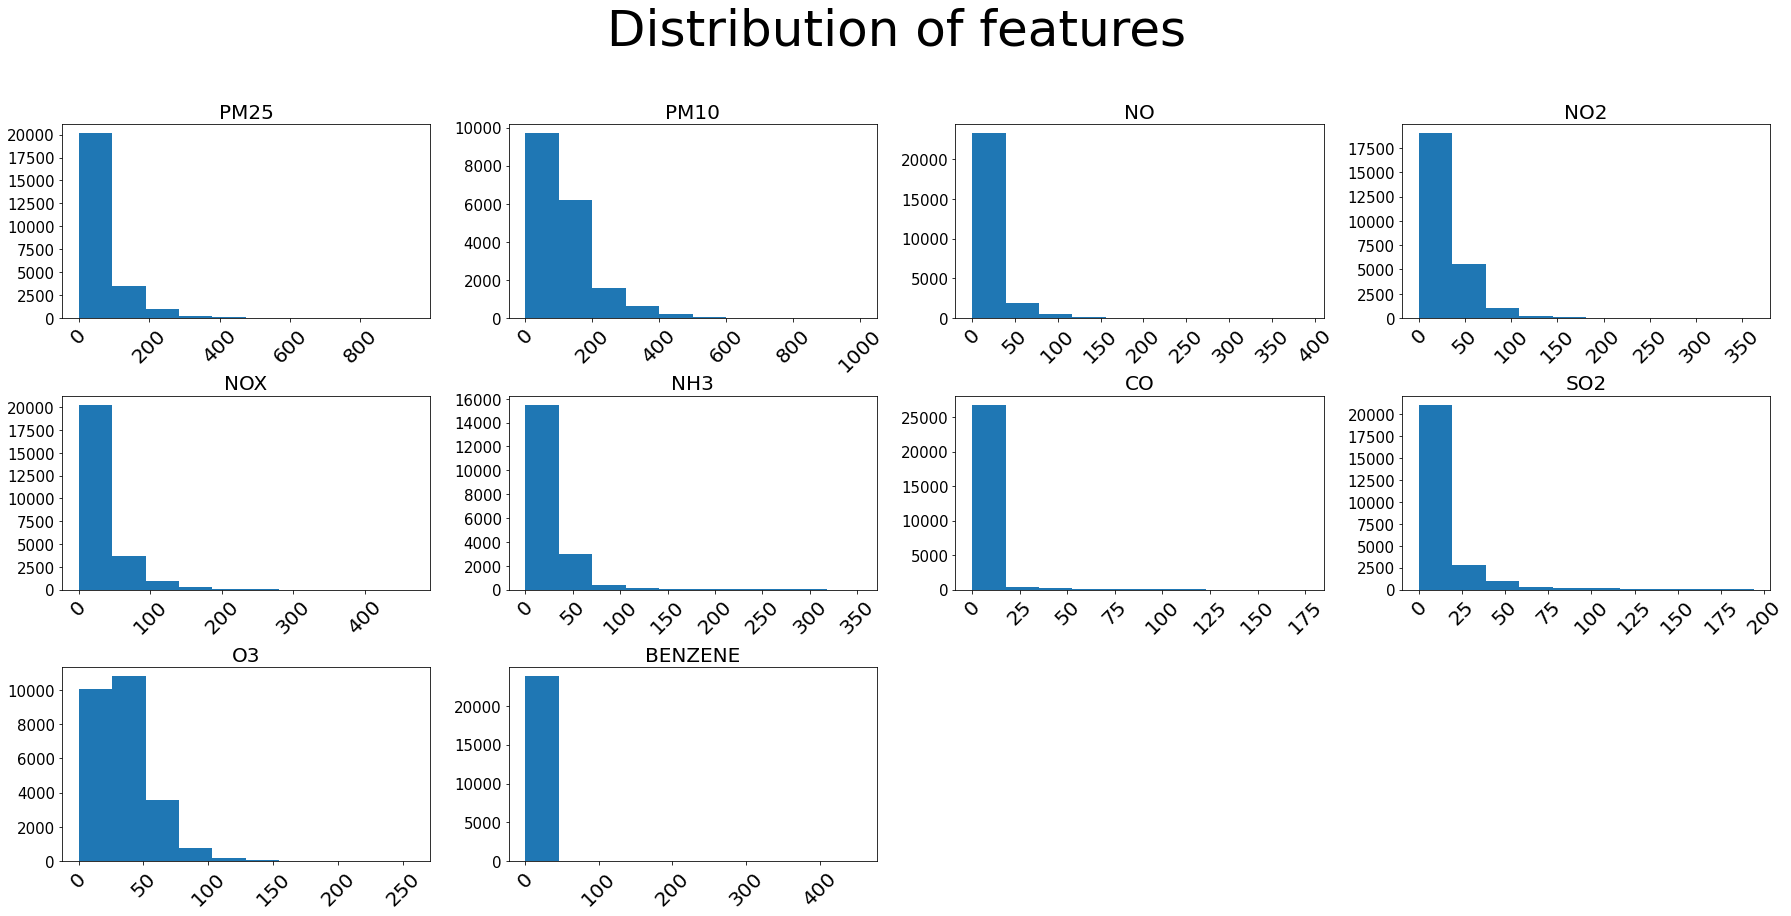

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore')

fig = plt.figure(figsize=(25,13))
st = fig.suptitle("Distribution of features",fontsize = 50, verticalalignment="center")
for col,num in zip(df.toPandas().describe().columns, range(1,11)):
    ax = fig.add_subplot(3,4, num)
    ax.hist(df.toPandas()[col])
    plt.grid(False)
    plt.xticks(rotation=45, fontsize=20)
    plt.yticks(fontsize=15)
    plt.title(col.upper(), fontsize=20)

plt.tight_layout()
st.set_y(0.95)
fig.subplots_adjust(top=0.85, hspace=0.4)
plt.show()

Now that we're done with this tutorial, let's move on to Spark DataFrame Operations!